In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Facilities

In [2]:
facility_fn = r'C:\Users\langhe\switchdrive\TIMCI\1 Project details\11 DM\Operations\Tanzania\TIMCI Tanzania MedAL-Creator facilities with medAL-c IDs.xlsx'
facilities_df = pd.read_excel(facility_fn, sheet_name="testepoct")
print(facilities_df.head(5))

   medAL-creator ID hf_number district       hf_name     ward village_street  \
0                80  111210-1   Kaliua       Makingi  Ichemba        Makingi   
1                81  107956-5   Kaliua  Tuombe Mungu   Ugunga   Tuombe Mungu   
2                82  108458-1   Kaliua        Usinge   Usinge         Usinge   
3                83  100498-5   Kaliua       Bukemba  Kanindo        Not set   
4                84  102849-7   Kaliua      Kilimawe    Uyowa     Songambele   

      hf_type urbanrural randomisation spa  Latitude  Longitude  
0  Dispensary      Rural  pulseOx+CDSA  No  -4.68289   32.29027  
1  Dispensary      Rural  pulseOx+CDSA  No  -5.09347   31.70730  
2  Dispensary      Rural  pulseOx+CDSA  No  -5.09609   31.30504  
3  Dispensary      Rural  pulseOx+CDSA  No  -4.67141   32.10370  
4  Dispensary      Rural  pulseOx+CDSA  No  -4.59118   32.02115  


# Patients

In [3]:
fn = r'25.06.2021/patients.csv'
patients_df = pd.read_csv(fn)
patients_df.drop(columns=['patient_first_name', 'patient_last_name'], inplace=True)
patients_df['date'] = patients_df['patient_created_at'].str.split(" ").str[0]
patients_df['date'] = patients_df['patient_created_at'].str.split(" ").str[0]
patients_df['date'] = pd.to_datetime(patients_df['date'])
patients_df = patients_df.merge(facilities_df, how='left', left_on='patient_group_id', right_on='medAL-creator ID')
patients_df = patients_df.dropna(subset=['hf_name'])
print(patients_df.head(5))
print(patients_df.columns)

   patient_id              patient_local_patient_id patient_birthdate  \
3           4  14b99c3f-35d3-4805-ac7a-ac6c77065752        2017-09-13   
4           5  1f1320d2-3356-4b6a-9fd2-76f795613b57        2019-07-18   
5           6  e8bda4d2-a79c-4f40-9a48-b09f4446acfd        2020-02-08   
6           7  80533483-847c-4831-89ce-ebd6842ed6a5        2020-10-12   
7           8  44f1d6fb-873c-4527-8ed8-7a9b4439e01e        2020-03-16   

   patient_weight patient_gender  patient_group_id  \
3            14.0         Female               101   
4            10.5         Female               101   
5             7.5         Female               101   
6             7.8           Male               101   
7             8.8           Male               101   

                                  patient_consent  patient_other_uid  merged  \
3  14b99c3f-35d3-4805-ac7a-ac6c77065752_image.jpg                NaN     NaN   
4  1f1320d2-3356-4b6a-9fd2-76f795613b57_image.jpg                NaN     NaN

# Medical cases

In [4]:
fn = r'25.06.2021/medical_cases.csv'
mdc_df = pd.read_csv(fn)
mdc_df = mdc_df.merge(patients_df, how='left', left_on='medical_case_patient_id', right_on='patient_id')
print(mdc_df.head(5))

   medical_case_id  medical_case_version_id  medical_case_patient_id  \
0                1                        1                        1   
1                2                        1                        2   
2                3                        1                        3   
3                4                        1                        4   
4                5                        1                        5   

  medical_case_created_at medical_case_updated_at  \
0     2021-04-23 08:50:13     2021-04-23 11:01:41   
1     2021-04-28 08:27:44     2021-04-28 11:51:07   
2     2021-05-04 12:17:00     2021-05-04 15:23:16   
3     2021-06-09 07:30:19     2021-06-09 11:34:24   
4     2021-06-09 07:24:06     2021-06-09 11:59:15   

     medical_case_local_medical_case_id  medical_case_consent  \
0  9bde0a57-74f1-47e7-842e-0ed2952eed7f                   NaN   
1  865cc821-12f8-4ea7-b5da-449c8df3b7fd                   NaN   
2  86ebf973-5b93-459c-afff-a658165c61cf              

In [5]:
visit_counts = mdc_df['medical_case_patient_id'].value_counts()
print(visit_counts[visit_counts>1].index.tolist())

[105, 14, 75, 21, 185, 52, 202]


# Medical case answers

In [6]:
fn = r'25.06.2021/nodes.csv'
nodes_df = pd.read_csv(fn)

# Extract unique node stage and catgeory
unique_sc = nodes_df[['node_stage', 'node_category']].drop_duplicates()
print(unique_sc)

# Create expanded label with stage and category
nodes_df['expanded_label'] = nodes_df.apply(lambda row: "{}_{}_{}".format(row['node_stage'], row['node_category'], row['node_label']), axis=1)
print(nodes_df.head(5))

               node_stage           node_category
0            registration             demographic
2            registration       basic_demographic
3                  triage      complaint_category
5                  triage       basic_measurement
9                  triage  unique_triage_question
30           consultation           physical_exam
31           consultation                 symptom
50                    NaN  background_calculation
54                   test         assessment_test
66           consultation  observed_physical_sign
83           consultation                exposure
92   diagnosis_management      treatment_question
144          consultation       chronic_condition
463  diagnosis_management                referral
590          consultation  background_calculation
813          consultation                 vaccine
   node_id  node_medal_c_id  node_reference  \
0        1             5819               0   
1        2             5817               0   
2        

In [7]:
fn = r'25.06.2021/answers.csv'
answers_df = pd.read_csv(fn)
print(answers_df.head(5))

   answer_id                          answer_label  answer_medal_c_id  \
0          1                   New (self-referral)               4726   
1          2  New (referral from another facility)               4725   
2          3                   Scheduled follow-up               4724   
3          4                 Unscheduled follow-up               4723   
4          5                                    No               4720   

   answer_node_id    answer_created_at    answer_updated_at  
0               1  2021-04-23 09:20:38  2021-04-23 09:20:38  
1               1  2021-04-23 09:20:38  2021-04-23 09:20:38  
2               1  2021-04-23 09:20:38  2021-04-23 09:20:38  
3               1  2021-04-23 09:20:38  2021-04-23 09:20:38  
4               2  2021-04-23 09:20:38  2021-04-23 09:20:38  


In [8]:
fn = r'25.06.2021/medical_case_answers.csv'
mca_df = pd.read_csv(fn)
print(mca_df.head(5))
mca_df = mca_df.merge(nodes_df, how='left', on='node_id')
mca_df = mca_df.merge(answers_df, how='left', on='answer_id')
print(mca_df.head(5))

   id  medical_case_id  answer_id  node_id                      value  \
0   1                1        NaN       47  2017-04-05T00:00:00+02:00   
1   2                1        NaN       46                       1479   
2   3                1        NaN        6                         15   
3   4                1        NaN       43                       14.2   
4   5                1        NaN       45                    Gilbert   

            created_at           updated_at  
0  2021-04-23 10:45:34  2021-04-23 10:45:34  
1  2021-04-23 10:45:34  2021-04-23 10:45:34  
2  2021-04-23 10:45:34  2021-04-23 10:45:34  
3  2021-04-23 10:45:34  2021-04-23 10:45:34  
4  2021-04-23 10:45:34  2021-04-23 10:45:34  
   id  medical_case_id  answer_id  node_id                      value  \
0   1                1        NaN       47  2017-04-05T00:00:00+02:00   
1   2                1        NaN       46                       1479   
2   3                1        NaN        6                        

In [9]:
def combine(a, b):
    
    s = ""
    if not(pd.isna(b)):
        s = str(b)
    else:
        if not(pd.isna(a)):
            s = str(a)
    
    return s

mca_df["value2"] = mca_df.apply(lambda row: combine(row["value"], row["answer_label"]), axis=1)
mca_wide_df = mca_df.pivot(index='medical_case_id', columns='node_id', values='value2')
columns_to_drop = [13, 28, 33, 44, 45]
mca_wide_df.drop(columns=columns_to_drop, inplace=True)
mca_wide_df.to_csv('list_of_answers.csv')
mca_wide_df.to_excel('list_of_answers.xlsx')

# Match node ID and labels (+ stage and category)
column_dict = nodes_df.set_index('node_id').to_dict()
mca_wide_df.columns = mca_wide_df.columns.to_series().map(column_dict['expanded_label'])

mca_wide_df.to_csv('raw_epoct_db.csv')
mca_wide_df.to_excel('raw_epoct_db.xlsx')

# Sort columns in stage and category order

# Registration
registration_basic_dmg_cols = mca_wide_df.columns[mca_wide_df.columns.str.contains("registration_basic_demographic_")]
registration_basic_dmg_df = mca_wide_df[registration_basic_dmg_cols]

registration_dmg_cols = mca_wide_df.columns[mca_wide_df.columns.str.contains("registration_demographic_")]
registration_dmg_df = mca_wide_df[registration_dmg_cols]

registration_df = pd.concat([registration_basic_dmg_df,
                             registration_dmg_df],
                            axis=1, join='inner')

# Triage
triage_unique_triage_question_cols = mca_wide_df.columns[mca_wide_df.columns.str.contains("triage_unique_triage_question_")]
triage_unique_triage_question_df = mca_wide_df[triage_unique_triage_question_cols]
triage_complaint_category_cols = mca_wide_df.columns[mca_wide_df.columns.str.contains("triage_complaint_category_")]
triage_complaint_category_df = mca_wide_df[triage_complaint_category_cols]
triage_basic_measurement_cols = mca_wide_df.columns[mca_wide_df.columns.str.contains("triage_basic_measurement_")]
triage_basic_measurement_df = mca_wide_df[triage_basic_measurement_cols]

triage_df = pd.concat([triage_unique_triage_question_df,
                       triage_complaint_category_df,
                       triage_basic_measurement_df],
                      axis=1, join='inner')

# Consultation
consultation_symptom_cols = mca_wide_df.columns[mca_wide_df.columns.str.contains("consultation_symptom_")]
consultation_symptom_df = mca_wide_df[consultation_symptom_cols]
consultation_observed_physical_sign_cols = mca_wide_df.columns[mca_wide_df.columns.str.contains("consultation_observed_physical_sign_")]
consultation_observed_physical_sign_df = mca_wide_df[consultation_observed_physical_sign_cols]
consultation_chronic_condition_cols = mca_wide_df.columns[mca_wide_df.columns.str.contains("consultation_chronic_condition_")]
consultation_chronic_condition_df = mca_wide_df[consultation_chronic_condition_cols]
consultation_exposure_cols = mca_wide_df.columns[mca_wide_df.columns.str.contains("consultation_exposure_")]
consultation_exposure_df = mca_wide_df[consultation_exposure_cols]
consultation_vaccine_cols = mca_wide_df.columns[mca_wide_df.columns.str.contains("consultation_vaccine")]
consultation_vaccine_df = mca_wide_df[consultation_vaccine_cols]
consultation_pe_cols = mca_wide_df.columns[mca_wide_df.columns.str.contains("consultation_physical_exam_")]
consultation_pe_df = mca_wide_df[consultation_pe_cols]

consultation_df = pd.concat([consultation_symptom_df,
                             consultation_observed_physical_sign_df,
                             consultation_chronic_condition_df,
                             consultation_exposure_df,
                             consultation_vaccine_df,
                             consultation_pe_df],
                            axis=1, join='inner')

# Test
test_cols = mca_wide_df.columns[mca_wide_df.columns.str.contains("test_assessment_test_")]
test_df = mca_wide_df[test_cols]

# Background calculation
bc_cols = mca_wide_df.columns[mca_wide_df.columns.str.contains("background_calculation_")]
bc_df = mca_wide_df[bc_cols]

# Diagnosis management
diagnosis_mgt_treatment_cols = mca_wide_df.columns[mca_wide_df.columns.str.contains("diagnosis_management_treatment_question_")]
diagnosis_mgt_treatment_df = mca_wide_df[diagnosis_mgt_treatment_cols]
diagnosis_mgt_referral_cols = mca_wide_df.columns[mca_wide_df.columns.str.contains("diagnosis_management_referral_")]
diagnosis_mgt_referral_df = mca_wide_df[diagnosis_mgt_referral_cols]

diagnosis_mgt_df = pd.concat([diagnosis_mgt_treatment_df,
                              diagnosis_mgt_referral_df],
                             axis=1, join='inner')

# Managements

In [10]:
fn = r'25.06.2021/managements.csv'
managements_df = pd.read_csv(fn)
print(managements_df.head(5))

   management_id  management_medal_c_id management_type  \
0              1                   5268      HealthCare   
1              2                   5249      HealthCare   
2              3                   5255      HealthCare   
3              4                   6027      HealthCare   
4              5                   6075      HealthCare   

                                    management_label  \
0            Teach the mother how to feed from a cup   
1  Teach the mother how to express breastmilk (IMCI)   
2  Teach correct positioning and attachment for b...   
3  Feeding recommendations for all young infants ...   
4  Feeding recommendations for all young infants ...   

                              management_description  management_diagnosis_id  \
0  • Put a cloth on the infant’s front to protect...                        1   
1  Ask the mother to: \n➜Wash her hands thoroughl...                        1   
2  ➜Show the mother how to hold her infant. \n−wi...             

## Recorded managements

In [11]:
fn = r'25.06.2021/management_references.csv'
mdc_managements_df = pd.read_csv(fn)
mdc_managements_df = mdc_managements_df.merge(managements_df, how='left', left_on='management_reference_management_id', right_on='management_id')
mdc_managements_df.to_excel("managements.xlsx")
print(mdc_managements_df.tail(5))

      management_reference_id  management_reference_agreed  \
1363                     1364                          1.0   
1364                     1365                          1.0   
1365                     1366                          NaN   
1366                     1367                          NaN   
1367                     1368                          NaN   

      management_reference_diagnosis_id management_reference_created_at  \
1363                                392             2021-06-29 10:10:40   
1364                                392             2021-06-29 10:10:40   
1365                                393             2021-06-29 10:10:40   
1366                                393             2021-06-29 10:10:40   
1367                                393             2021-06-29 10:10:40   

     management_reference_updated_at  management_reference_management_id  \
1363             2021-06-29 10:10:40                                 152   
1364             2021-06

In [12]:
# Accepted managements
mdc_accepted_managements_df = mdc_managements_df.dropna(subset=['management_reference_agreed']).copy()
mdc_accepted_managements_df = mdc_accepted_managements_df.groupby('management_reference_diagnosis_id').agg({'management_label': ';'.join}).reset_index()
mdc_accepted_managements_df = mdc_accepted_managements_df.rename(columns={"management_label": "accepted_managements"})
print(mdc_accepted_managements_df)

     management_reference_diagnosis_id  \
0                                    1   
1                                    2   
2                                    3   
3                                    4   
4                                    5   
..                                 ...   
320                                384   
321                                385   
322                                387   
323                                391   
324                                392   

                                  accepted_managements  
0    Refer urgently for inpatient management;Oxygen...  
1    No inpatient referral needed: Reasons to retur...  
2    Keep the child warm;Refer urgently for inpatie...  
3    Keep the child warm;Refer urgently for inpatie...  
4    No inpatient referral needed: Reasons to retur...  
..                                                 ...  
320  No inpatient referral needed: Reasons to retur...  
321  Refer to RCH clinic to complete va

# Drugs

In [13]:
fn = r'25.06.2021/drugs.csv'
drugs_df = pd.read_csv(fn)
print(drugs_df.head(5))

   drug_id  drug_medal_c_id   drug_type  \
0        1             5387  HealthCare   
1        2             5298  HealthCare   
2        3             5933  HealthCare   
3        4             5935  HealthCare   
4        5             5332  HealthCare   

                                          drug_label  \
0  Oral Rehydration Salts (ORS) by naso-gastric tube   
1                                   Ciprofloxacin po   
2                            Gentamicin pre-referral   
3                            Ampicillin pre-referral   
4      Ampiclox IM pre-referral for <= 7 days of age   

                                    drug_description  drug_diagnosis_id  \
0  ORS by naso-gastric tube in cases of Severe de...                9.0   
1    Antibiotic: for dysentery treatment in neonates               13.0   
2  Antibiotic, 5-7.5 mg/kg/dose, 1 IM injection b...               18.0   
3  Antibiotic: 50 mg/kg/dose, give one dose IM be...               18.0   
4      100mg/kg 2 times per d

## Recorded drugs

In [14]:
fn = r'25.06.2021/drug_references.csv'
mdc_drugs_df = pd.read_csv(fn)
mdc_drugs_df = mdc_drugs_df.merge(drugs_df, how='left', left_on='drug_reference_drug_id', right_on='drug_id')
mdc_drugs_df.to_excel("drugs.xlsx")
print(mdc_drugs_df)

     drug_reference_id  drug_reference_drug_id  \
0                    1                      41   
1                    2                      42   
2                    3                      41   
3                    4                      67   
4                    5                      41   
..                 ...                     ...   
984                985                     328   
985                986                      41   
986                987                     133   
987                988                     134   
988                989                     328   

     drug_reference_diagnosis_reference_id  drug_reference_agreed  \
0                                        1                    1.0   
1                                        1                    1.0   
2                                        2                    1.0   
3                                        2                    1.0   
4                                        4            

In [15]:
# Accepted drugs
mdc_accepted_drugs_df = mdc_drugs_df.dropna(subset=['drug_reference_agreed']).copy()
drugs_count = mdc_accepted_drugs_df['drug_label'].value_counts()
mdc_accepted_drugs_df = mdc_accepted_drugs_df.groupby('drug_reference_diagnosis_reference_id').agg({'drug_label': ';'.join}).reset_index()
mdc_accepted_drugs_df = mdc_accepted_drugs_df.rename(columns={"drug_label": "accepted_drugs"})

# Rejected drugs
mdc_rejected_drugs_df = mdc_drugs_df[mdc_drugs_df['drug_reference_agreed'].isnull()]
mdc_rejected_drugs_df = mdc_rejected_drugs_df.groupby('drug_reference_diagnosis_reference_id').agg({'drug_label': ';'.join}).reset_index()
mdc_rejected_drugs_df = mdc_rejected_drugs_df.rename(columns={"drug_label": "rejected_drugs"})
print(mdc_rejected_drugs_df.tail(5))

mdc_classified_drugs_df = mdc_accepted_drugs_df.merge(mdc_rejected_drugs_df[['drug_reference_diagnosis_reference_id','rejected_drugs']], how='outer', on='drug_reference_diagnosis_reference_id')

     drug_reference_diagnosis_reference_id  \
300                                    387   
301                                    388   
302                                    389   
303                                    390   
304                                    393   

                                        rejected_drugs  
300  Ciprofloxacin eye drops;Vitamin A  po (retinol...  
301                                     Paracetamol po  
302  Paracetamol po;Artemether-Lumefantrine po (Wei...  
303  Albendazole po (deworming);Mebendazole po (dew...  
304  Albendazole po (deworming);Mebendazole po (dew...  


Paracetamol po                                     97
Amoxicillin HD po                                  16
Hydrocortisone cream                                8
Zinc sulfate 10 mg (half a tablet)                  7
Chloramphenicol eye drops                           6
Artemether-Lumefantrine po (Weight 5 to <15kg)      5
Potassium permanganate solution 1:4000 (0.025%)     5
Mebendazole po (deworming)                          5
Cetirizine po (for 6 months to 2 years)             4
Artemether-Lumefantrine po (Weight 15 to <25kg)     3
Others                                             31
dtype: int64


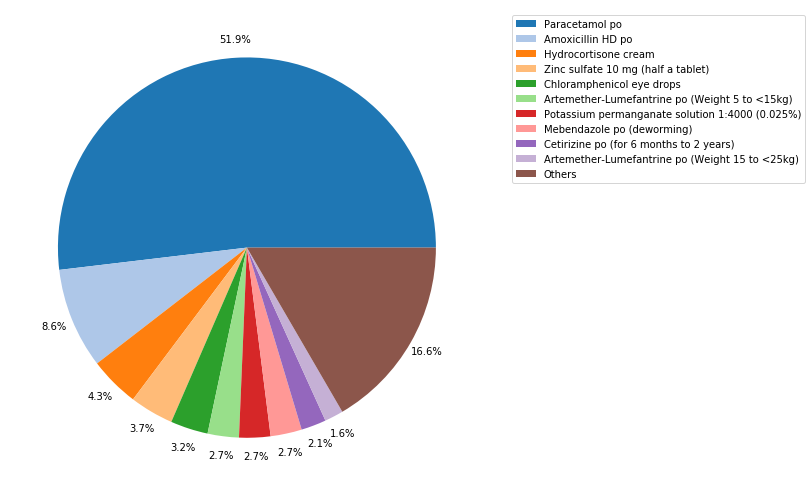

In [16]:
# Top n drugs
n = 10
drugs_count_n = drugs_count[:n].copy()

# Others
others = pd.Series([drugs_count.values[n:].sum()])

# Combining top n with others
drugs_count_n = pd.concat([drugs_count_n, others])
drugs_count_n = drugs_count_n.rename({0: 'Others'})
print(drugs_count_n)

with plt.style.context({"axes.prop_cycle" : plt.cycler("color", plt.cm.tab20.colors)}):
    ax = drugs_count_n.head(15).plot.pie(figsize=(11.5, 7),
                                         labels=None,
                                         autopct=lambda p:'{:.1f}%'.format(p),
                                         pctdistance=1.1)
    ax.set_ylabel('')
plt.legend(labels=drugs_count_n.index, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Diagnoses

In [17]:
fn = r'25.06.2021/diagnoses.csv'
diagnoses_df = pd.read_csv(fn)
print(diagnoses_df.head(5))

   diagnosis_id  diagnosis_medal_c_id  \
0             1                  6984   
1             2                  6985   
2             3                  7228   
3             4                  7227   
4             5                  6987   

                                     diagnosis_label  diagnosis_diagnostic_id  \
0                        Feeding problem (lactation)                     2901   
1               Feeding problem (Insufficient feeds)                     2901   
2                                 Low weight for age                     3035   
3                            Very low weight for age                     3035   
4  Feeding problem (mixed feeding in infants with...                     2902   

  diagnosis_created_at diagnosis_updated_at   diagnosis_type  \
0  2021-04-23 09:21:07  2021-04-23 09:21:07  FinalDiagnostic   
1  2021-04-23 09:21:07  2021-04-23 09:21:07  FinalDiagnostic   
2  2021-04-23 09:21:07  2021-04-23 09:21:07  FinalDiagnostic   
3  2021-04

## Recorded diagnoses

In [18]:
fn = r'25.06.2021/diagnosis_references.csv'
mdc_diagnoses_df = pd.read_csv(fn)
mdc_diagnoses_df = mdc_diagnoses_df.merge(diagnoses_df, how='left', left_on='diagnosis_reference_diagnosis_id', right_on='diagnosis_id')
mdc_diagnoses_df = mdc_diagnoses_df.merge(mdc_accepted_managements_df, how='left', left_on='diagnosis_reference_id', right_on='management_reference_diagnosis_id')
mdc_diagnoses_df = mdc_diagnoses_df.merge(mdc_classified_drugs_df, how='left', left_on='diagnosis_reference_id', right_on='drug_reference_diagnosis_reference_id')
mdc_diagnoses_df.to_excel("diagnoses.xlsx")
print(mdc_diagnoses_df.head(5))

   diagnosis_reference_id  diagnosis_reference_agreed  \
0                       1                         1.0   
1                       2                         1.0   
2                       3                         1.0   
3                       4                         1.0   
4                       5                         1.0   

   diagnosis_reference_proposed_additional  diagnosis_reference_diagnosis_id  \
0                                      1.0                                40   
1                                      1.0                                84   
2                                      1.0                                99   
3                                      1.0                                31   
4                                      NaN                                45   

   diagnosis_reference_medical_case_id diagnosis_reference_created_at  \
0                                    1            2021-04-23 10:45:44   
1                             

In [19]:
# Accepted diagnoses
mdc_accepted_diagnoses_df = mdc_diagnoses_df.dropna(subset=['diagnosis_reference_agreed','diagnosis_reference_proposed_additional']).copy()
diagnoses_count = mdc_accepted_diagnoses_df['diagnosis_label'].value_counts()
mdc_accepted_diagnoses_accepted_drugs_df = mdc_diagnoses_df.dropna(subset=['diagnosis_reference_agreed','diagnosis_reference_proposed_additional','accepted_drugs']).copy()
mdc_accepted_diagnoses_rejected_drugs_df = mdc_diagnoses_df.dropna(subset=['diagnosis_reference_agreed','diagnosis_reference_proposed_additional','rejected_drugs']).copy()
mdc_accepted_diagnoses_accepted_managements_df = mdc_diagnoses_df.dropna(subset=['diagnosis_reference_agreed','diagnosis_reference_proposed_additional','accepted_managements']).copy()

mdc_accepted_diagnoses_df = mdc_accepted_diagnoses_df.groupby('diagnosis_reference_medical_case_id').agg({'diagnosis_label': ';'.join}).reset_index()
mdc_accepted_diagnoses_df = mdc_accepted_diagnoses_df.rename(columns={"diagnosis_label": "accepted_diagnoses"})
mdc_accepted_diagnoses_accepted_drugs_df = mdc_accepted_diagnoses_accepted_drugs_df.groupby('diagnosis_reference_medical_case_id').agg({'accepted_drugs':';'.join}).reset_index()
mdc_accepted_diagnoses_rejected_drugs_df = mdc_accepted_diagnoses_rejected_drugs_df.groupby('diagnosis_reference_medical_case_id').agg({'rejected_drugs':';'.join}).reset_index()
mdc_accepted_diagnoses_accepted_managements_df = mdc_accepted_diagnoses_accepted_managements_df.groupby('diagnosis_reference_medical_case_id').agg({'accepted_managements':';'.join}).reset_index()

# Rejected diagnoses
mdc_rejected_diagnoses_df = mdc_diagnoses_df[mdc_diagnoses_df['diagnosis_reference_agreed'].isnull()]
mdc_rejected_diagnoses_df = mdc_rejected_diagnoses_df.groupby('diagnosis_reference_medical_case_id').agg({'diagnosis_label': ';'.join}).reset_index()
mdc_rejected_diagnoses_df = mdc_rejected_diagnoses_df.rename(columns={"diagnosis_label": "rejected_diagnoses"})

# Added diagnoses
mdc_additional_diagnoses_df = mdc_diagnoses_df[mdc_diagnoses_df['diagnosis_reference_proposed_additional'].isnull()]
mdc_additional_diagnoses_df = mdc_additional_diagnoses_df.groupby('diagnosis_reference_medical_case_id').agg({'diagnosis_label': ';'.join}).reset_index()
mdc_additional_diagnoses_df = mdc_additional_diagnoses_df.rename(columns={"diagnosis_label": "proposed_additional_diagnoses"})

mdc_diagnoses_df = mdc_accepted_diagnoses_df.merge(mdc_rejected_diagnoses_df[['diagnosis_reference_medical_case_id','rejected_diagnoses']], how='outer', on='diagnosis_reference_medical_case_id')
mdc_diagnoses_df = mdc_diagnoses_df.merge(mdc_additional_diagnoses_df[['diagnosis_reference_medical_case_id','proposed_additional_diagnoses']], how='outer', on='diagnosis_reference_medical_case_id')

# Drugs
mdc_diagnoses_df = mdc_diagnoses_df.merge(mdc_accepted_diagnoses_accepted_drugs_df[['diagnosis_reference_medical_case_id','accepted_drugs']], how='left', on='diagnosis_reference_medical_case_id')
mdc_diagnoses_df["accepted_drug_flag"] = pd.isna(mdc_diagnoses_df["accepted_drugs"])
mdc_diagnoses_df = mdc_diagnoses_df.merge(mdc_accepted_diagnoses_rejected_drugs_df[['diagnosis_reference_medical_case_id','rejected_drugs']], how='left', on='diagnosis_reference_medical_case_id')

# Managements
mdc_diagnoses_df = mdc_diagnoses_df.merge(mdc_accepted_diagnoses_accepted_managements_df[['diagnosis_reference_medical_case_id','accepted_managements']], how='left', on='diagnosis_reference_medical_case_id')

Screening and Prevention          132
Common cold                        47
Pneumonia                          18
Uncomplicated malaria              15
Non-severe abdominal condition     14
Uncomplicated impetigo             14
Eczema (Atopic dermatitis)          8
Acute diarrhea                      7
Urticaria                           7
Moderate malnutrition               6
Others                             56
dtype: int64


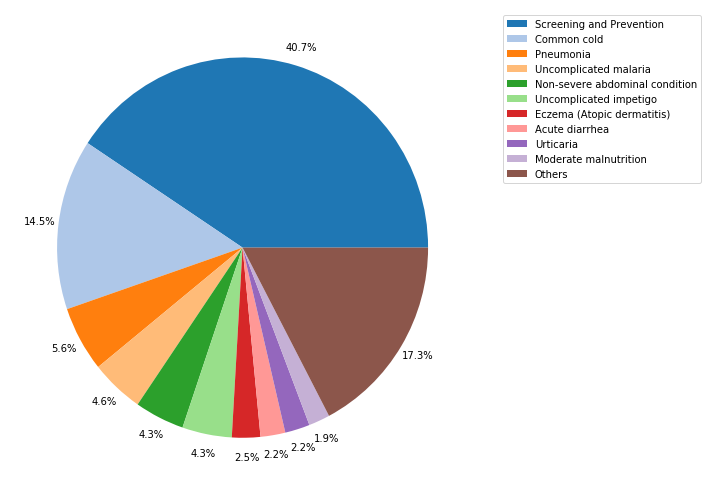

Screening and Prevention          132
Common cold                        47
Pneumonia                          18
Uncomplicated malaria              15
Non-severe abdominal condition     14
Uncomplicated impetigo             14
Eczema (Atopic dermatitis)          8
Acute diarrhea                      7
Urticaria                           7
Moderate malnutrition               6
Others                             56
dtype: int64


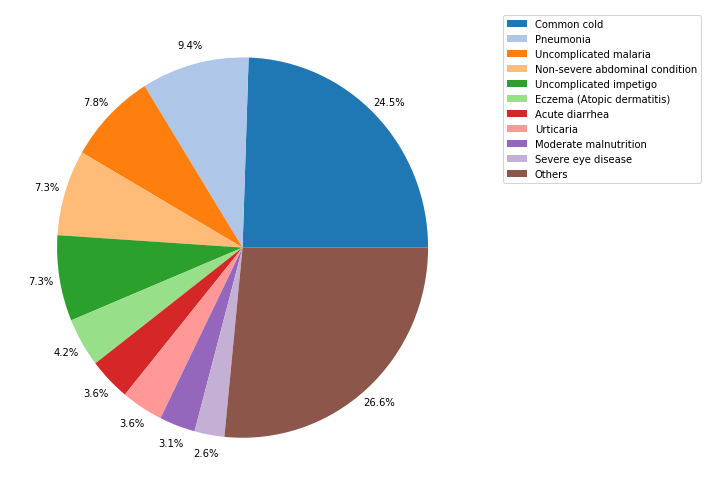

In [20]:
# Top n diagnoses
n = 10
diagnoses_count_n = diagnoses_count[:n].copy()

# Others
others = pd.Series([diagnoses_count.values[n:].sum()])

# Combining top n with others
diagnoses_count_n = pd.concat([diagnoses_count_n, others])
diagnoses_count_n = diagnoses_count_n.rename({0: 'Others'})
print(diagnoses_count_n)

with plt.style.context({"axes.prop_cycle" : plt.cycler("color", plt.cm.tab20.colors)}):
    ax = diagnoses_count_n.head(15).plot.pie(figsize=(10, 7),
                                             labels=None,
                                             autopct=lambda p:'{:.1f}%'.format(p),
                                             pctdistance=1.1)
    ax.set_ylabel('')
plt.legend(labels=diagnoses_count_n.index, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

diagnoses_count1 = diagnoses_count.iloc[1:].copy()
diagnoses_count_n1 = diagnoses_count1[:n].copy()

# Others
others = pd.Series([diagnoses_count1.values[n:].sum()])

# Combining top n with others
diagnoses_count_n1 = pd.concat([diagnoses_count_n1, others])
diagnoses_count_n1 = diagnoses_count_n1.rename({0: 'Others'})
print(diagnoses_count_n)

with plt.style.context({"axes.prop_cycle" : plt.cycler("color", plt.cm.tab20.colors)}):
    ax = diagnoses_count_n1.head(15).plot.pie(figsize=(10, 7),
                                              labels=None,
                                              autopct=lambda p:'{:.1f}%'.format(p),
                                              pctdistance=1.1)
    ax.set_ylabel('')
plt.legend(labels=diagnoses_count_n1.index, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
# Final sorted dataframe
mca_wide_df1 = pd.concat([registration_df,
                          triage_df,
                          consultation_df,
                          test_df],
                         axis=1, join='outer')
mca_wide_df1 = mdc_df.merge(mca_wide_df1, how='left', left_on='medical_case_id', right_index=True)
mca_wide_df1 = mca_wide_df1.merge(mdc_diagnoses_df, how='left', left_on='medical_case_id', right_on='diagnosis_reference_medical_case_id')
mca_wide_df1.to_csv('epoct_db.csv')
mca_wide_df1.to_excel('epoct_db.xlsx')

# Final sorted dataframe
mca_wide_df1 = pd.concat([mca_wide_df1,
                          diagnosis_mgt_df,
                          bc_df],
                         axis=1, join='outer')

mca_wide_df1.to_csv('epoct_diag_db.csv')
mca_wide_df1.to_excel('epoct_diag_db.xlsx')

## Count medical records that reach a diagnosis

In [22]:
count_patients_per_day = patients_df.groupby(patients_df['date'])['hf_name'].value_counts()
mdc_df['date'] = pd.to_datetime(mdc_df['date'])
count_mdc_per_day = mdc_df.groupby(mdc_df['date'])['hf_name'].value_counts()
count_diagnosis_per_day = mca_wide_df1.dropna(subset=['diagnosis_reference_medical_case_id']).groupby(mdc_df['date'])['hf_name'].value_counts()
count_accepted_drugs_per_day = mca_wide_df1.dropna(subset=['accepted_drugs']).groupby(mdc_df['date'])['hf_name'].value_counts()

mindate = min(count_diagnosis_per_day.index.min()[0],count_patients_per_day.index.min()[0])
maxdate = max(count_diagnosis_per_day.index.max()[0],count_patients_per_day.index.max()[0])
idx = pd.date_range(mindate, maxdate)

count_patients_per_day = (count_patients_per_day.unstack(level=1).reindex(idx))
count_patients_per_day = count_patients_per_day.fillna(0)  # for the data, 0 is the desired value
count_patients_per_day = count_patients_per_day.unstack().swaplevel(0,1).sort_index()

count_mdc_per_day = (count_mdc_per_day.unstack(level=1).reindex(idx))
count_mdc_per_day = count_mdc_per_day.fillna(0)  # for the data, 0 is the desired value
count_mdc_per_day = count_mdc_per_day.unstack().swaplevel(0,1).sort_index()

count_diagnosis_per_day = (count_diagnosis_per_day.unstack(level=1).reindex(idx))
count_diagnosis_per_day = count_diagnosis_per_day.fillna(0)  # for the data, 0 is the desired value
count_diagnosis_per_day = count_diagnosis_per_day.unstack().swaplevel(0,1).sort_index()

count_accepted_drugs_per_day = (count_accepted_drugs_per_day.unstack(level=1).reindex(idx))
count_accepted_drugs_per_day = count_accepted_drugs_per_day.fillna(0)  # for the data, 0 is the desired value
count_accepted_drugs_per_day = count_accepted_drugs_per_day.unstack().swaplevel(0,1).sort_index()

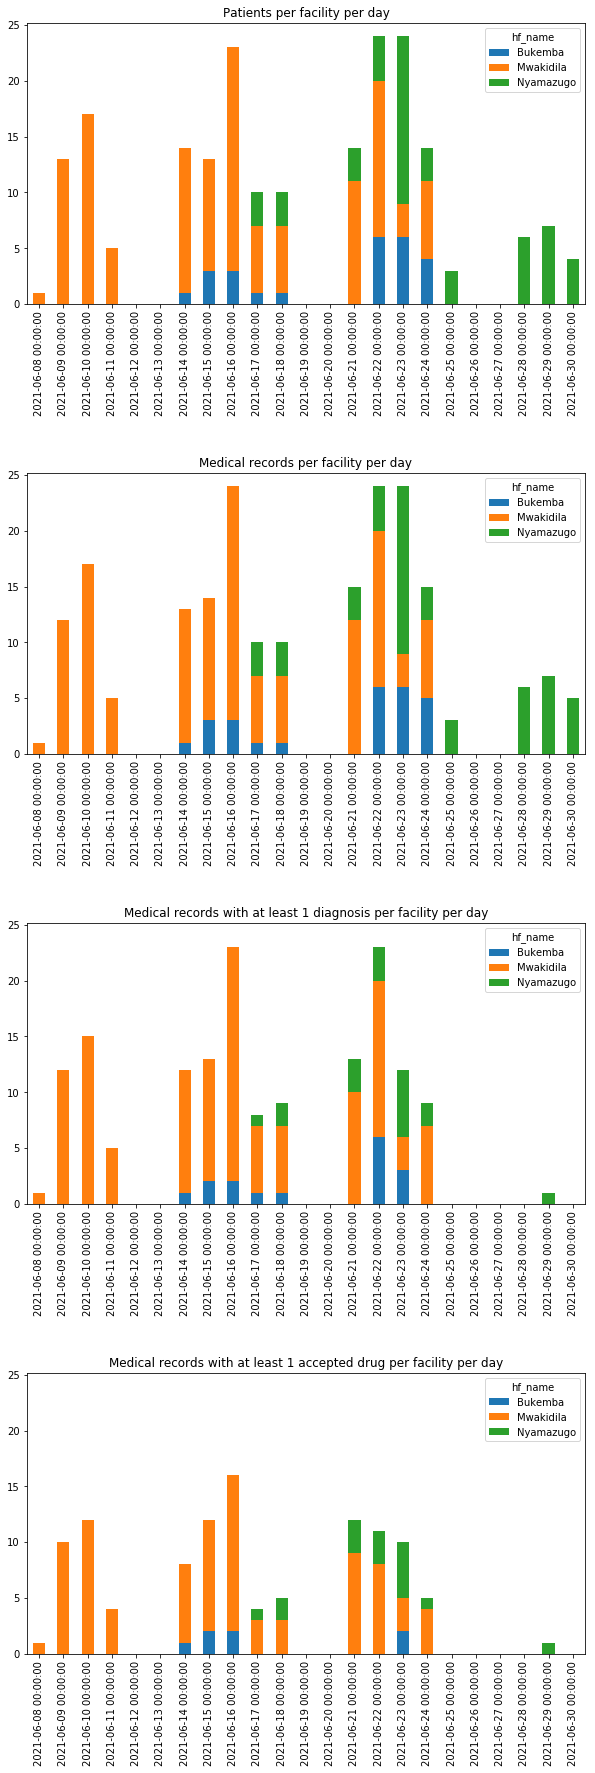

In [23]:
fig = plt.figure(figsize=(10, 30))
gs = gridspec.GridSpec(4, 1)
gs.update(wspace=0.025, hspace=0.6) # set the spacing between axes. 

ax1 = fig.add_subplot(gs[1])
count_mdc_per_day.unstack(1).plot(ax = ax1, kind="bar", stacked=True)
ax1.xaxis_date()
ylim = ax1.get_ylim()
xlim = ax1.get_xlim()
ax1.set_title('Medical records per facility per day')

ax2 = fig.add_subplot(gs[0])
count_patients_per_day.unstack(1).plot(ax = ax2, ylim = ylim, kind="bar", stacked=True)
ax2.set_xlim(xlim)
ax2.xaxis_date()
ax2.set_title('Patients per facility per day')

ax3 = fig.add_subplot(gs[2])
count_diagnosis_per_day.unstack(1).plot(ax = ax3, ylim = ylim, kind="bar", stacked=True)
ax3.set_xlim(xlim)
ax3.xaxis_date()
ax3.set_title('Medical records with at least 1 diagnosis per facility per day')

ax4 = fig.add_subplot(gs[3])
count_accepted_drugs_per_day.unstack(1).plot(ax = ax4, ylim = ylim, kind="bar", stacked=True)
ax4.set_xlim(xlim)
ax4.xaxis_date()
ax4.set_title('Medical records with at least 1 accepted drug per facility per day')
plt.show()

In [25]:
count_all = pd.concat([count_patients_per_day,count_mdc_per_day, count_diagnosis_per_day, count_accepted_drugs_per_day], axis=1)
count_all = count_all.rename(columns={0: "patients", 1: "records", 2:"records_with_diagnosis", 3:"records_with_accepted_drugs"})
count_all["diagnosis_ratio"] = count_all.apply(lambda row: round(10000*row["records_with_diagnosis"]/row["records"])/100 if row["records"]>0 else np.nan, axis=1)
count_all["drug_ratio"] = count_all.apply(lambda row: round(10000*row["records_with_accepted_drugs"]/row["records"])/100 if row["records"]>0 else np.nan, axis=1)
print(count_all)
count_all.to_excel("count_and_ratio.xlsx")

                      patients  records  records_with_diagnosis  \
           hf_name                                                
2021-06-08 Bukemba         0.0      0.0                     0.0   
           Mwakidila       1.0      1.0                     1.0   
           Nyamazugo       0.0      0.0                     0.0   
2021-06-09 Bukemba         0.0      0.0                     0.0   
           Mwakidila      13.0     12.0                    12.0   
...                        ...      ...                     ...   
2021-06-29 Mwakidila       0.0      0.0                     0.0   
           Nyamazugo       7.0      7.0                     1.0   
2021-06-30 Bukemba         0.0      0.0                     0.0   
           Mwakidila       0.0      0.0                     0.0   
           Nyamazugo       4.0      5.0                     0.0   

                      records_with_accepted_drugs  diagnosis_ratio  drug_ratio  
           hf_name                             